User Engagement Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Retrieving Data saved after Task 1

In [2]:
df = pd.read_excel(r'C:\Users\Niti\NEXT HIKES\PROJECT 5\Telecom_data for 2nd question.xlsx')

In [3]:
df.head(2)

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,...,Actual Duration,xDR sessions,Total_social_media,Total_google,Total_email,Total_youtube,Total_netflix,Total_gaming,Total_others,Total_data
0,41943,13114483554762799104,2019-04-25 04:53:40,138.0,2019-04-26 13:19:00,278.0,116720.0,2.082014e+14,3.360100e+10,8.627420e+13,...,116720.140,1.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,812458661.0,386570872.0,878690574.0
1,127709,7349883260786089984,2019-04-27 23:07:30,422.0,2019-04-30 01:28:01,385.0,181230.0,2.082015e+14,3.360100e+10,3.553261e+13,...,181230.963,1.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,119750078.0,281710071.0,156859643.0


●	sessions frequency 
●	the duration of the session 
●	the session total traffic (download and upload (bytes))

Task 2.1 - Based on the above submit the Python script and slide:

●	Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 


Calculating sessions frequency

In [4]:
# session frequency = Number of sessions / Duration
df['session_frequency'] = df['Dur. (s)'].count() / df['Dur. (s)']
df['session_frequency']

0         1.285135
1         0.827683
2         1.111374
3         3.007358
4         8.086743
            ...   
149996    1.468424
149997    2.665689
149998    0.170964
149999    0.592819
150000    0.172446
Name: session_frequency, Length: 150001, dtype: float64

Top 10 customers per Session Frequency

In [5]:
df.sort_values('session_frequency', ascending= False)[['session_frequency', 'Bearer Id', 'MSISDN/Number']][:10]

,session_frequency,Bearer Id,MSISDN/Number
139057,21.002660,13042425959676700672,3.376351e+10
84768,20.990904,6917537669513839616,3.366566e+10
48473,20.865350,13042425959679600640,3.365933e+10
149294,20.798808,,4.188282e+10
118360,20.666988,6917537673690099712,3.369839e+10
33238,20.641393,6917537685489510400,3.365043e+10
118913,20.593218,7277825656116110336,3.369851e+10
149287,20.587565,,4.188282e+10
67456,20.567805,7277825656125230080,3.366246e+10
89646,20.475157,6917537685270169600,3.366684e+10


In [6]:
# Converting session frequency from string to float
df['session_frequency'] = pd.to_numeric(df['session_frequency'], errors= 'coerce').astype(float)

Top 10 customers per Duration of the Session

In [7]:
df.sort_values('Dur. (s)', ascending= False)[['Dur. (s)', 'Bearer Id', 'MSISDN/Number']][:10]

,Dur. (s),Bearer Id,MSISDN/Number
17512,1859336.0,13042425888056700928,3.362578e+10
17511,1859327.0,13114483482094899200,3.362578e+10
80985,1823652.0,13114483460844900352,3.366496e+10
17510,1772931.0,13042425892766199808,3.362578e+10
17513,1686493.0,13042425897887000576,3.362578e+10
139307,1679813.0,13114483483343300608,3.376355e+10
139305,1634983.0,13114483485797599232,3.376355e+10
17507,1600087.0,13042425902779299840,3.362578e+10
100160,1573420.0,7349883197380169728,3.366926e+10
62707,1480875.0,13114483483535099904,3.366172e+10


Top 10 customers per Total Traffic

In [8]:
df.sort_values('Total_data', ascending= False)[['Total_data', 'Bearer Id', 'MSISDN/Number']][:10]

,Total_data,Bearer Id,MSISDN/Number
105973,955984776.0,13114483554691000320,3.367492e+10
79423,952641334.0,13042425983537399808,3.366469e+10
97137,952307464.0,13042425965954600960,3.366855e+10
44807,951775502.0,13042425970157099008,3.365881e+10
93980,950760661.0,7349883259602259968,3.366783e+10
5083,949987157.0,7349883254375789568,3.361083e+10
2264,949598255.0,13042425956863500288,3.360667e+10
68351,949292055.0,7277825667157449728,3.366261e+10
64904,949172538.0,7349883247402359808,3.366205e+10
97023,948809765.0,7349883264187780096,3.366853e+10


Total data has been calculated as Total Traffic

●	Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

In [9]:
engagement_metrics = df[['session_frequency', 'Dur. (s)', 'Total_data']]

Here we have taken features as engagement metrics in which 3 columns have been included

Text(0.5, 1.0, 'ScatterPlot for 3 engagement metrics to check valus of k')

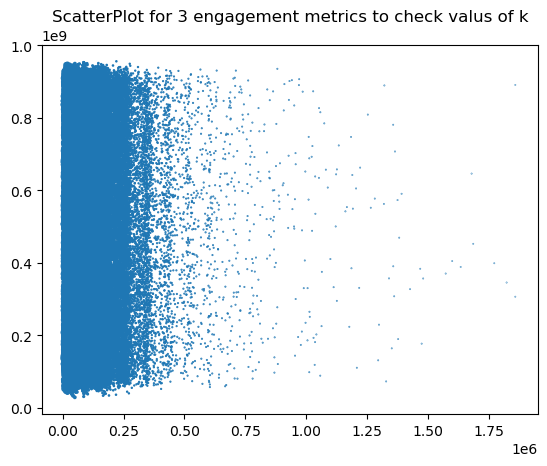

In [10]:
plt.scatter(df['Dur. (s)'], df['Total_data'], df['session_frequency'])
plt.title('ScatterPlot for 3 engagement metrics to check valus of k')

These are the clusters for all 3 engagement metrics


Scaling features

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
engagement_metrics_scaled = scaler.fit_transform(engagement_metrics)
engagement_metrics_scaled

array([[0.05756915, 0.05916119, 0.91662156],
       [0.03570448, 0.09399015, 0.1379715 ],
       [0.04926393, 0.06901383, 0.61164276],
       ...,
       [0.00431552, 0.46984441, 0.21916028],
       [0.02447877, 0.13275499, 0.6119894 ],
       [0.00438636, 0.46577302, 0.11887177]])

KMeans Clustering

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)
df['engagement_cluster'] = kmeans.fit_predict(engagement_metrics)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
pred = kmeans.labels_

In [13]:
df['engagement_cluster']

0         1
1         0
2         2
3         2
4         2
         ..
149996    2
149997    2
149998    0
149999    2
150000    0
Name: engagement_cluster, Length: 150001, dtype: int32

In [14]:
df['engagement_cluster'].unique()

array([1, 0, 2])

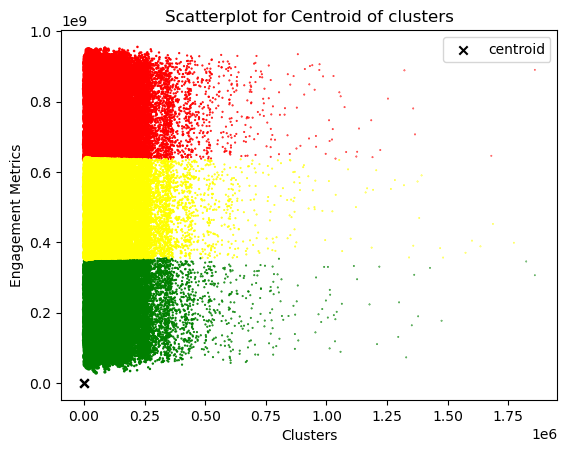

In [21]:
df0 = df[df.engagement_cluster==0]
df1 = df[df.engagement_cluster==1]
df2 = df[df.engagement_cluster==2]
plt.scatter(df0['Dur. (s)'],df0['Total_data'],df0['session_frequency'],color = 'green')
plt.scatter(df1['Dur. (s)'],df1['Total_data'],df1['session_frequency'],color = 'red')
plt.scatter(df2['Dur. (s)'],df2['Total_data'],df2['session_frequency'],color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'black',marker='x',label = 'centroid')
plt.xlabel('Clusters')
plt.ylabel('Engagement Metrics')
plt.title('Scatterplot for Centroid of clusters')
plt.legend()

3 clusters have been separated whose values comes out to be 0, 1 and 2

In [22]:
ssd_values = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(engagement_metrics_scaled)
    ssd_values.append(kmeans.inertia_)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [23]:
kmeans.inertia_

1197.5559751130054

In [24]:
ssd_values

[12615.590745479212,
 4805.798993085926,
 3357.6988550934984,
 2562.9605067350126,
 2078.2383476779796,
 1679.1555814283981,
 1465.3110624793972,
 1322.6798704089592,
 1197.5559751130054]

Text(0.5, 1.0, 'Plot for Elbow Method to calculate k')

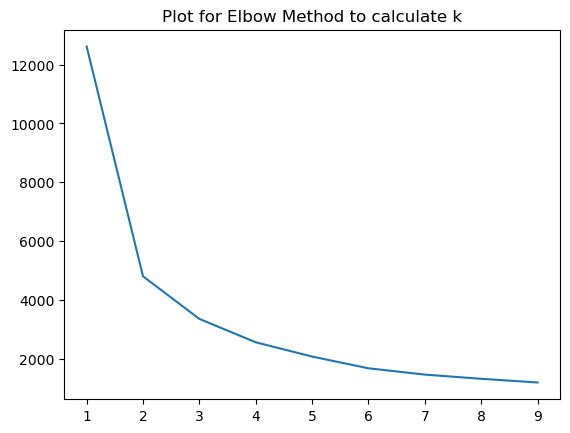

In [25]:
plt.plot(range(1,10),ssd_values)
plt.title('Plot for Elbow Method to calculate k')

Value of k should be 2

●	Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [26]:
df['engagement_cluster'].describe()

count    150001.000000
mean          1.001793
std           0.816744
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: engagement_cluster, dtype: float64

Visualize the clusters

Text(0.5, 1.0, 'Plot for matrics of Clusters')

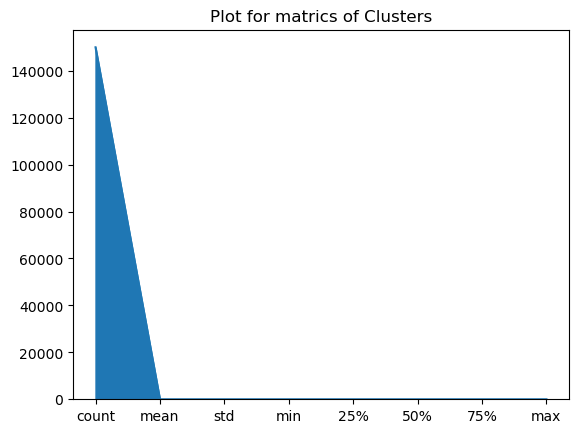

In [27]:
df['engagement_cluster'].describe().plot(kind='area')
plt.title('Plot for matrics of Clusters')

Among all these 3 clusters, obviously their minimum would be 0 and maximum would be 2 and the mean comes out to be 1.

In [28]:
labels = kmeans.labels_
labels = pd.DataFrame(labels)
kmeans_df = pd.concat([engagement_metrics, labels], axis= 1)
kmeans_df = kmeans_df.rename(columns={0:'engagement_labels'})

C:\Users\Niti\AppData\Local\Temp\ipykernel_24308\1733016466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_metrics['k = 3 engagement_labels'] = kmeans.labels_


Text(0.5, 1.0, 'BarChart for Engagement metrics and Engagement labels')

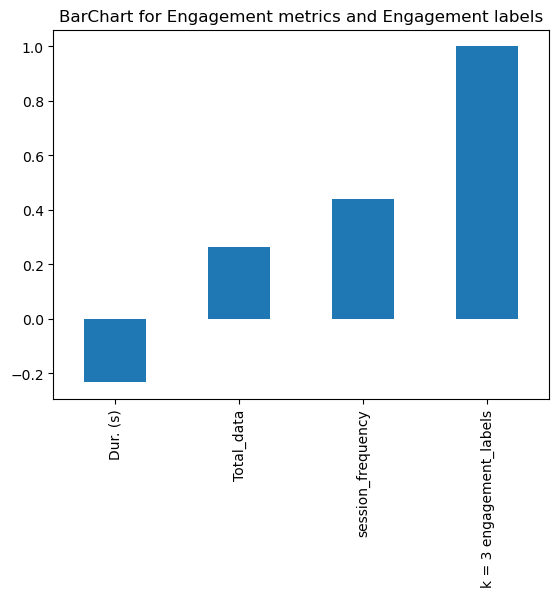

In [30]:
engagement_metrics['k = 3 engagement_labels'] = kmeans.labels_
engagement_metrics.corr()['k = 3 engagement_labels'].sort_values().plot(kind= 'bar')
plt.title('BarChart for Engagement metrics and Engagement labels')

Here we have calculated the engagement labels ralationship with engagement matrics

In [31]:
kmeans_df

,session_frequency,Dur. (s),Total_data,engagement_labels
0,1.285135,116720.0,878690574.0,3
1,0.827683,181230.0,156859643.0,0
2,1.111374,134969.0,595966483.0,1
3,3.007358,49878.0,422320698.0,6
4,8.086743,18549.0,585578364.0,8
...,...,...,...,...
149996,1.468424,102151.0,538210557.0,6
149997,2.665689,56271.0,579709567.0,6
149998,0.170964,877385.0,232123971.0,0
149999,0.592819,253030.0,596287824.0,1


c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

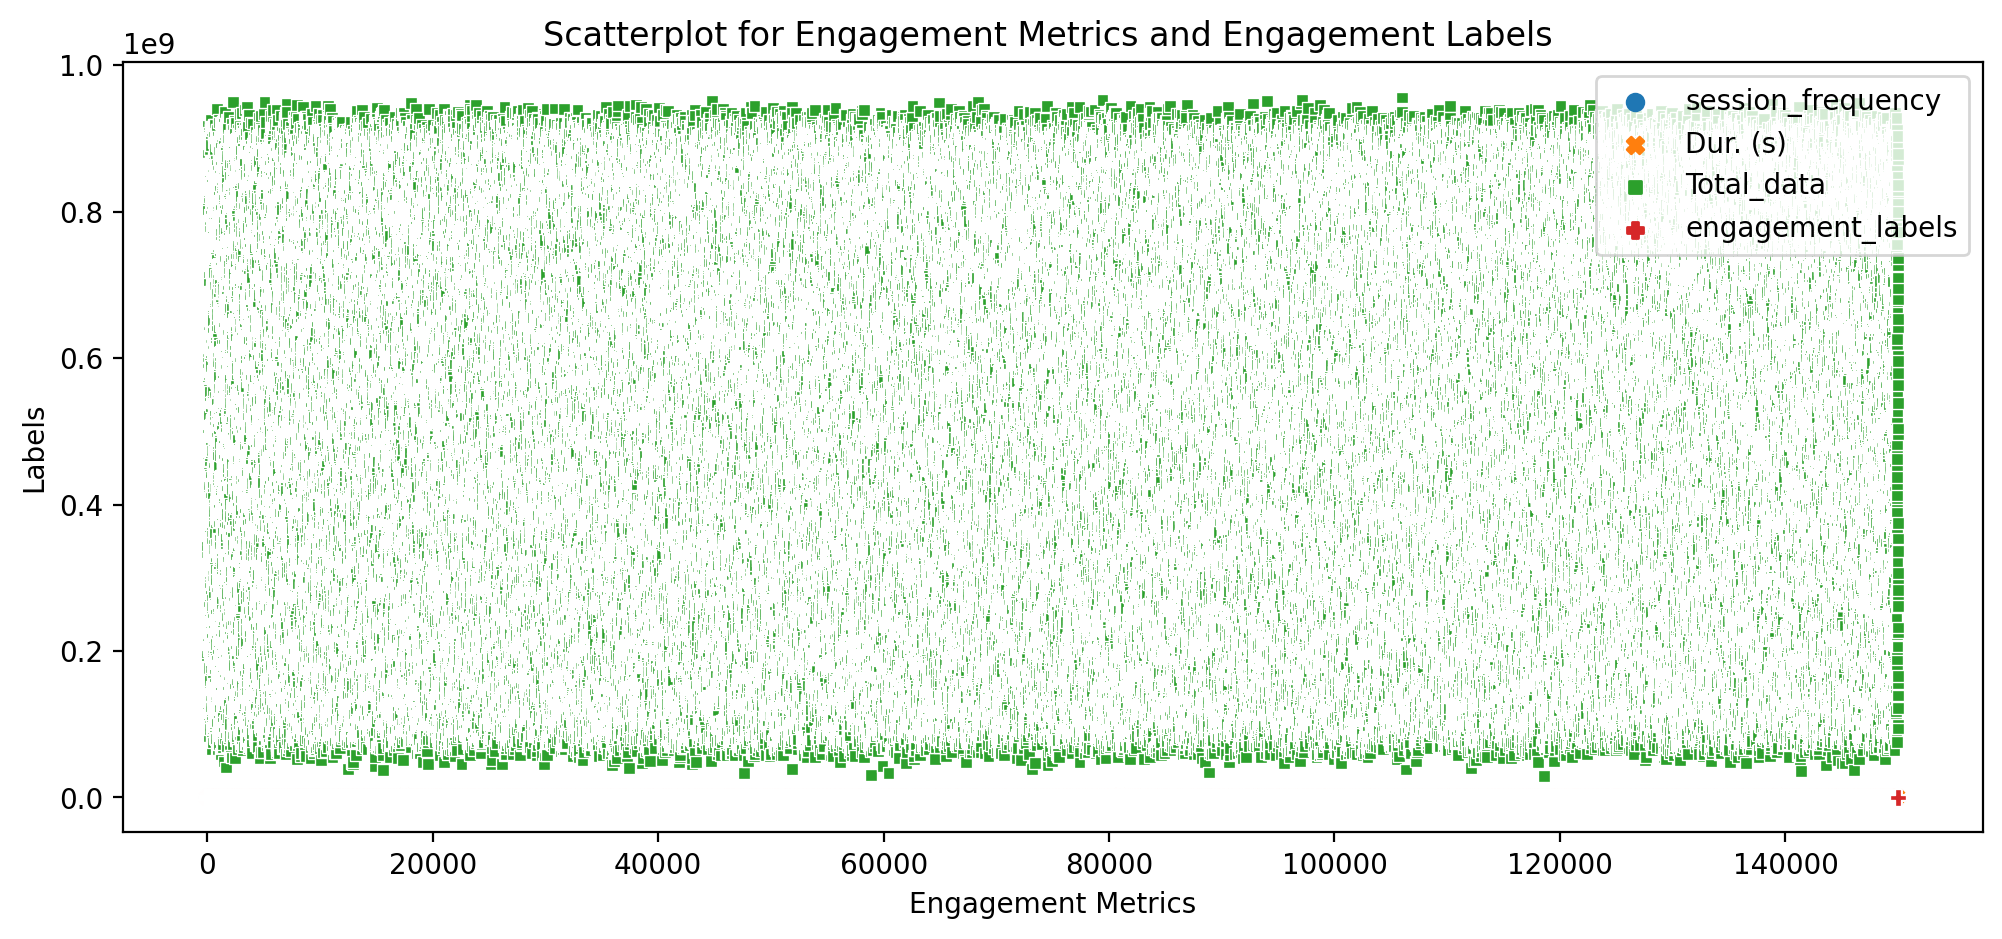

In [32]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(data= kmeans_df, cmap = 'magma')
plt.title('Scatterplot for Engagement Metrics and Engagement Labels ')
plt.xlabel('Engagement Metrics')
plt.ylabel('Labels')
plt.show()

●	Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [33]:
print(f"(Total data of Social Media is: {df['Social Media DL (Bytes)'].sum() + df['Social Media UL (Bytes)'].sum()})")
print(f"(Total data of Google is: {df['Google DL (Bytes)'].sum() + df['Google UL (Bytes)'].sum()})")
print(f"(Total data of Email is: {df['Email DL (Bytes)'].sum() + df['Email UL (Bytes)'].sum()})")
print(f"(Total data of Youtube is: {df['Youtube DL (Bytes)'].sum() + df['Youtube UL (Bytes)'].sum()})")
print(f"(Total data of Netflix is: {df['Netflix DL (Bytes)'].sum() + df['Netflix UL (Bytes)'].sum()})")
print(f"(Total data of Gaming is: {df['Gaming DL (Bytes)'].sum() + df['Gaming UL (Bytes)'].sum()})")
print(f"(Total data of Other is: {df['Other DL (Bytes)'].sum() + df['Other UL (Bytes)'].sum()})")

(Total data of Social Media is: 274239359454.20804)
(Total data of Google is: 1171101989130.5454)
(Total data of Email is: 338867605596.30994)
(Total data of Youtube is: 3396545039272.6387)
(Total data of Netflix is: 3394313609363.538)
(Total data of Gaming is: 64550395439016.7)
(Total data of Other is: 64405230908181.62)


User Total Traffic(data) per application

In [34]:
Total_social_media = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
Total_google = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
Total_email = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
Total_youtube = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
Total_netflix = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
Total_gaming = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
Total_others = df['Other DL (Bytes)'] + df['Other UL (Bytes)'] 

Making them different columns in data

In [35]:
df['Total_social_media'] = Total_social_media
df['Total_google'] = Total_google
df['Total_email'] = Total_email
df['Total_youtube'] = Total_youtube
df['Total_netflix'] = Total_netflix
df['Total_gaming'] = Total_gaming
df['Total_others'] = Total_others

In [36]:
Total_data_of_applications = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)'] + df['Google DL (Bytes)'] + df['Google UL (Bytes)'] + df['Email DL (Bytes)'] + df['Email UL (Bytes)'] + df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)'] + df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)'] + df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)'] +	df['Other DL (Bytes)'] + df['Other UL (Bytes)']
Total_data_of_applications

0         1.255788e+09
1         4.364173e+08
2         1.091053e+09
3         4.475687e+08
4         1.290927e+09
              ...     
149996    6.642749e+08
149997    1.222409e+09
149998    6.998021e+08
149999    7.406419e+08
150000    5.283134e+08
Length: 150001, dtype: float64

In [37]:
df['Total_data_of_applications'] = Total_data_of_applications

In [38]:
user_app_traffic = df.groupby(['Total_data_of_applications', 'MSISDN/Number'])['Total_data'].sum().reset_index()
sorted_user_app_traffic = user_app_traffic.sort_values(by = ['Total_data_of_applications', 'Total_data'], ascending=False)
top_users_per_app = sorted_user_app_traffic.groupby('Total_data_of_applications').head(10)
top_users_per_app[:10]

,Total_data_of_applications,MSISDN/Number,Total_data
150000,1.780674e+09,3.365094e+10,944863143.0
149999,1.772824e+09,3.366385e+10,929878474.0
149998,1.771882e+09,3.366556e+10,935701394.0
149997,1.769959e+09,3.360823e+10,934692904.0
149996,1.769330e+09,3.376016e+10,927501997.0
149995,1.765674e+09,3.377877e+10,929043600.0
149994,1.764959e+09,3.362127e+10,924637565.0
149993,1.764237e+09,3.364546e+10,934084917.0
149992,1.763498e+09,3.366401e+10,921442721.0
149991,1.762451e+09,3.366836e+10,929506176.0


Top 10 most engaged users per application

In [39]:
# List of columns representing different applications
app_columns = ['Total_social_media', 'Total_google', 'Total_email', 'Total_youtube', 'Total_netflix', 'Total_gaming', 'Total_others']

# Group by columns representing different applications and sum the 'MSISDN/Number' for each user and application combination
user_app_traffic = df.groupby(app_columns)['MSISDN/Number'].sum().reset_index()

# Sort the DataFrame by columns representing different applications in descending order
sorted_user_app_traffic = user_app_traffic.sort_values(by=app_columns, ascending=False)

# Group by columns representing different applications again and get the top 10 users for each combination
top_users_per_app = sorted_user_app_traffic.groupby(app_columns).head(10)

# Display the result for the first 10 rows
print(top_users_per_app.head(10))


        Total_social_media  Total_google  Total_email  Total_youtube  \
150000           3650861.0    13480026.0    1527319.0     39679647.0   
149999           3650240.0     5400904.0     165743.0     18313951.0   
149998           3648814.0    11140496.0    1872798.0      6947985.0   
149997           3648729.0     8976477.0     889502.0     22808316.0   
149996           3648659.0     4573862.0    4187154.0     15977932.0   
149995           3648092.0     3203423.0    1062497.0     31115567.0   
149994           3648027.0    11127646.0    2045449.0     18809122.0   
149993           3647700.0    12039201.0     571755.0     23546408.0   
149992           3647486.0     5130020.0    1743452.0     33680657.0   
149991           3647484.0     3438266.0     908916.0     42101095.0   

        Total_netflix  Total_gaming  Total_others  MSISDN/Number  
150000      6225069.0   130423422.0    20325819.0   3.366178e+10  
149999     27891387.0   478059662.0   757089626.0   3.375024e+10  
149998

Findings: Gaming is used the most which is 86.8% and after this other applications are used which are 86.6%. Rest Netflix and Youtube are used 4% each and Google is used only 1.5%

●	Plot the top 3 most used applications using appropriate charts.

In [40]:
plt.figure(figsize=(10,6), dpi = 200)
sns.jointplot(df['Total_gaming'], kind='kde', color = 'red', shade = True, alpha = 0.5)
plt.title('JointPlot for Gaming Application ')
plt.show()
ImportWarning

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

Gaming is the most used application

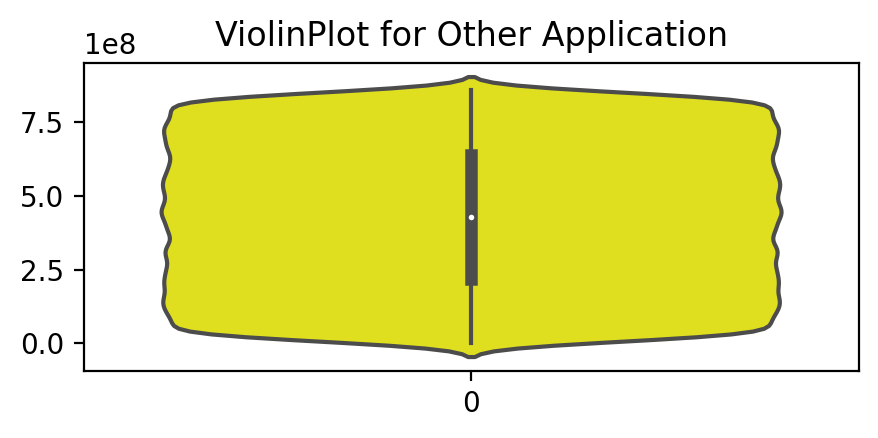

In [ ]:
plt.figure(figsize=(5,2), dpi = 200)
sns.violinplot(df['Total_others'], color = 'yellow')
plt.title('ViolinPlot for Other Application')
plt.show()

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

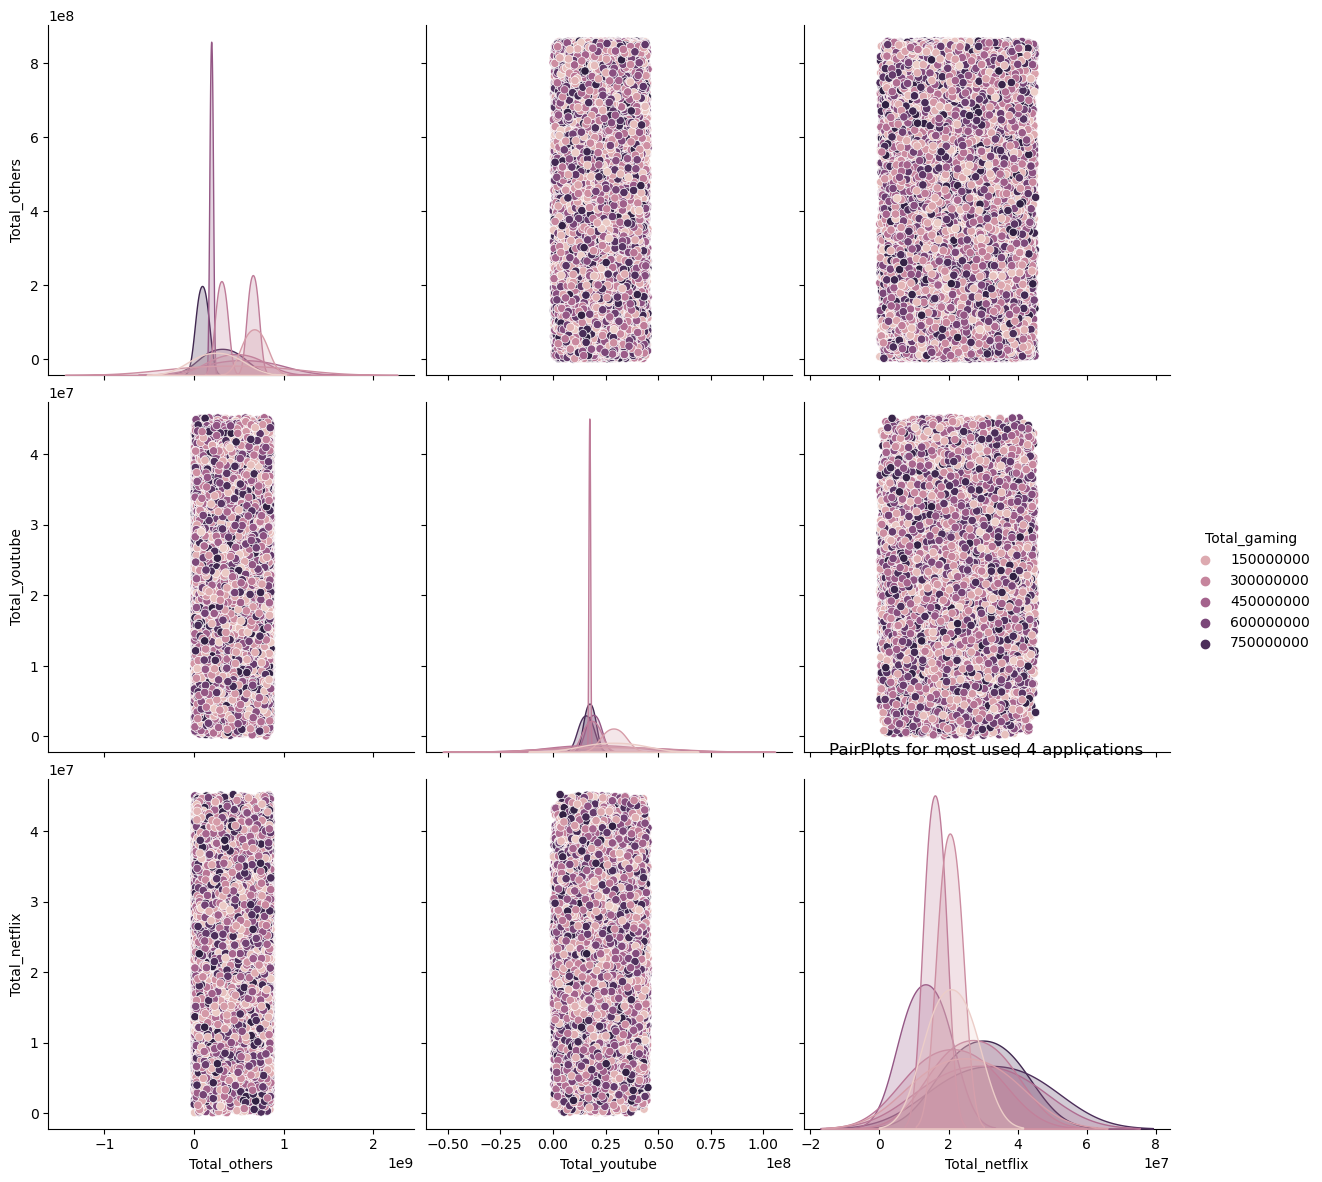

In [ ]:
dfpair = df[['Total_gaming', 'Total_others', 'Total_youtube', 'Total_netflix']]
sns.pairplot(dfpair, hue = 'Total_gaming', diag_kind= 'kde', height = 4)
plt.title('PairPlots for most used 4 applications')
plt.show()

●	Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
○	What is the optimized value of k (use the elbow method for this)?  
○	Interpret your findings. 


In [ ]:
ssd_values = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(engagement_metrics_scaled)
    ssd_values.append(kmeans.inertia_)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0.5, 1.0, 'Elbow Method for calculating k')

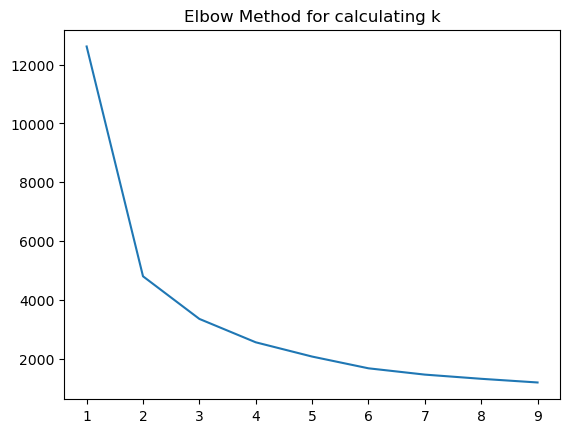

In [ ]:
plt.plot(range(1,10),ssd_values)
plt.title('Elbow Method for calculating k')

The valus of k should be 2

Saving Engagement labels as Engagement Score

In [ ]:
df['engagement_score'] = kmeans_df['engagement_labels']

saving data for task 3

In [ ]:
df.to_excel("Telecom_data for 3rd question.xlsx")